<a href="https://colab.research.google.com/github/isisCarolineLima/Projeto_Regressao_Linear/blob/main/Trabalho_em_dupla_Grupo_47_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🎲 Projeto: Implementação e Análise do Algoritmo de Regressão Linear

INTEGRANTES: Isis Caroline Lima Viana e Marco Antonio Oliveira Santos

## 📂 Importando as Bibliotecas



In [ ]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
import seaborn as sns

sns.set(style='whitegrid')

## 📂 Carregando o Dataset



In [ ]:
# Passo 1: Carregar os dados do arquivo CSV a partir da URL
url = 'https://drive.google.com/uc?id=1_F_oUDjtdqZ9s3g3il9i2j6XPfuS4uoT'
try:
    instagram_data = pd.read_csv(url)
    print("Dados carregados com sucesso!")
    print(instagram_data.head())
except Exception as e:
    print("Erro ao carregar os dados:", e)
    exit()

Dados carregados com sucesso!
   rank channel_info  influence_score  posts followers avg_likes  \
0     1    cristiano               92   3.3k    475.8m      8.7m   
1     2  kyliejenner               91   6.9k    366.2m      8.3m   
2     3     leomessi               90  0.89k    357.3m      6.8m   
3     4  selenagomez               93   1.8k    342.7m      6.2m   
4     5      therock               91   6.8k    334.1m      1.9m   

  60_day_eng_rate new_post_avg_like total_likes        country  
0           1.39%              6.5m       29.0b          Spain  
1           1.62%              5.9m       57.4b  United States  
2           1.24%              4.4m        6.0b            NaN  
3           0.97%              3.3m       11.5b  United States  
4           0.20%            665.3k       12.5b  United States  


## 📂 Visualizando os Dados



In [ ]:
# Passo 2: Selecionar as colunas relevantes para análise
columns_to_plot = ['followers', 'posts', 'new_post_avg_like', 'total_likes', '60_day_eng_rate', 'avg_likes']
instagram_data_selected = instagram_data[columns_to_plot].dropna()

# Função para converter valores com unidades (ex.: 'k', 'm', '%') para numérico
def convert_to_numeric(value):
    if isinstance(value, str):
        if "k" in value:
            return float(value.replace("k", "")) * 1e3
        elif "m" in value:
            return float(value.replace("m", "")) * 1e6
        elif "b" in value:
            return float(value.replace("b", "")) * 1e9
        elif "%" in value:
            return float(value.replace("%", "")) / 100  # Convertendo porcentagem
    return value

# Aplicar a conversão para criar um DataFrame numérico
instagram_data_numeric = instagram_data_selected.applymap(convert_to_numeric)

# Verificar se há valores ausentes após a conversão
print("Valores ausentes após conversão numérica:")
print(instagram_data_numeric.isnull().sum())

# Garantir que todas as colunas sejam numéricas
instagram_data_numeric = instagram_data_numeric.apply(pd.to_numeric, errors='coerce')

Valores ausentes após conversão numérica:
followers            0
posts                0
new_post_avg_like    0
total_likes          0
60_day_eng_rate      1
avg_likes            0
dtype: int64


<ipython-input-32-53525782d7ff>:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  instagram_data_numeric = instagram_data_selected.applymap(convert_to_numeric)


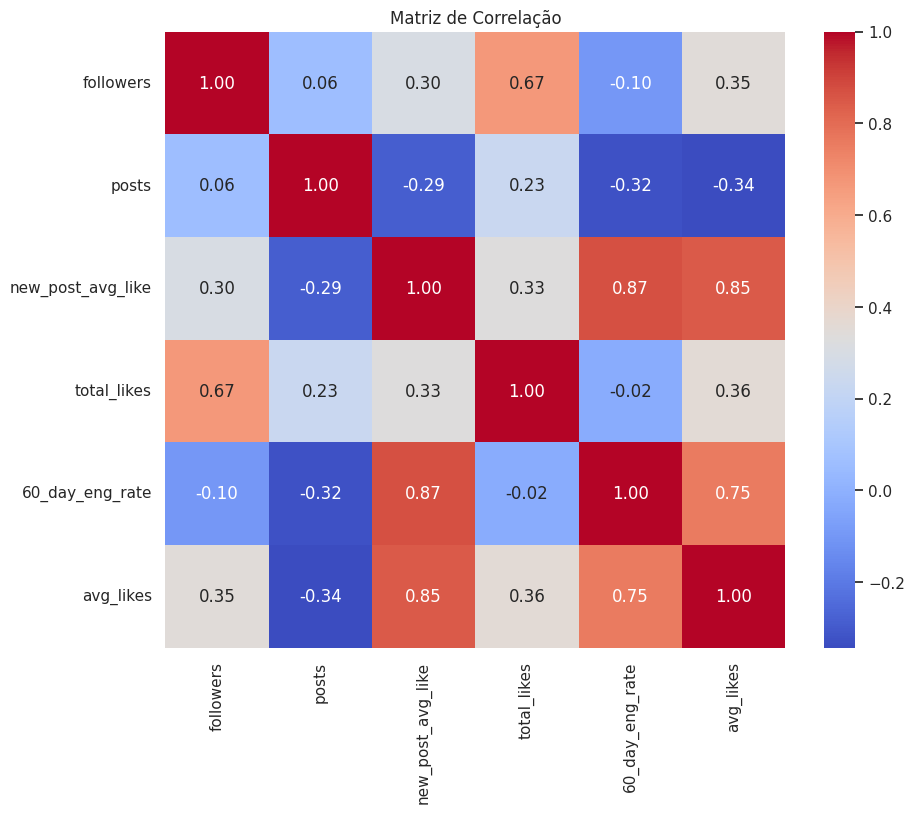

In [ ]:
# Passo 3: Calcular e visualizar a matriz de correlação
correlation_matrix = instagram_data_numeric.corr()

# Exibe a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

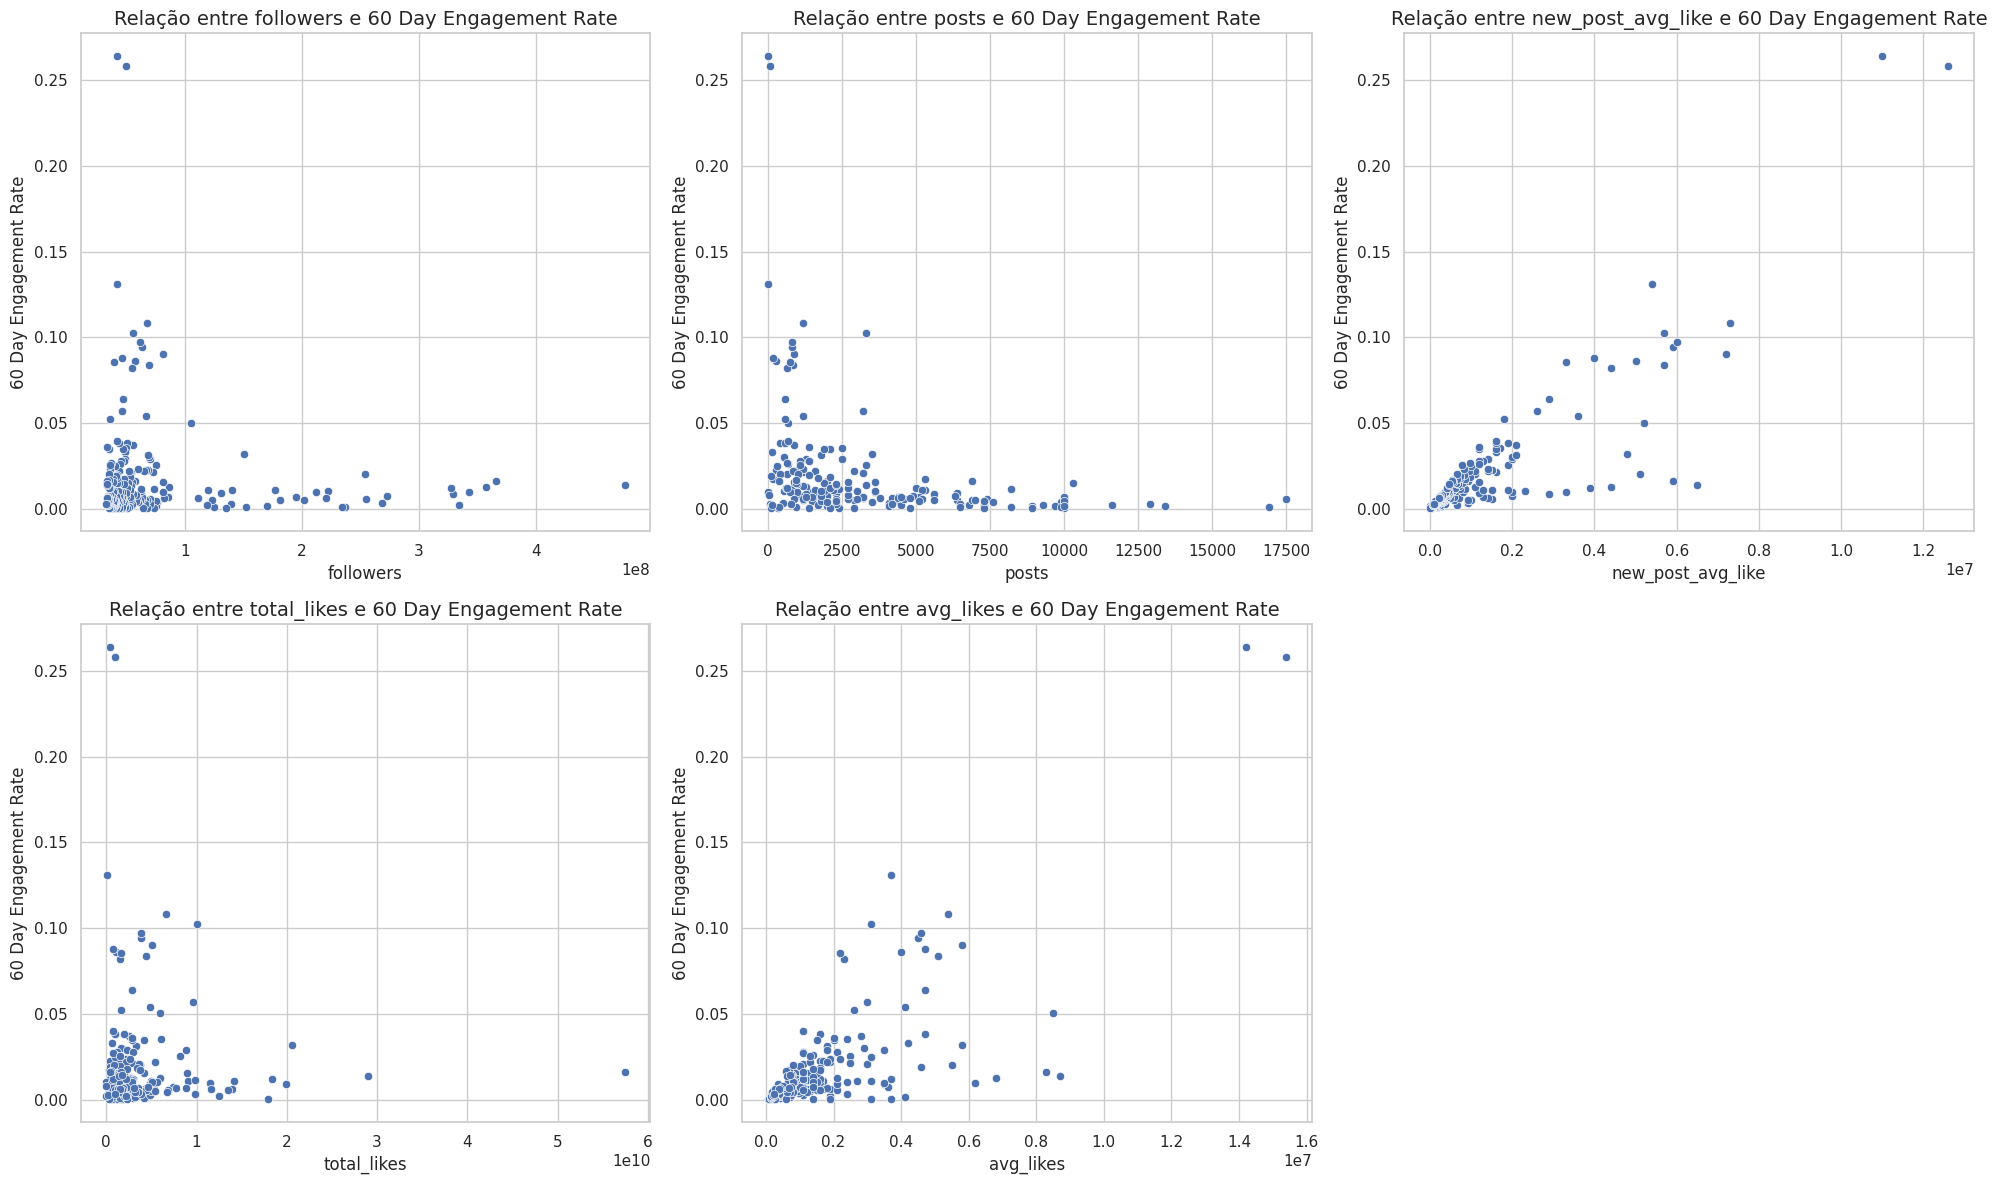

In [ ]:
# Passo 4: Criar gráficos de dispersão para análise das variáveis
plt.figure(figsize=(20, 12))

# Remover a variável dependente dos gráficos
independent_columns = [col for col in columns_to_plot if col != '60_day_eng_rate']

for i, column in enumerate(independent_columns, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(
        x=instagram_data_numeric[column],
        y=instagram_data_numeric['60_day_eng_rate']
    )
    plt.title(f'Relação entre {column} e 60 Day Engagement Rate', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('60 Day Engagement Rate', fontsize=12)

plt.tight_layout()
plt.show()


#### 🔄 Divisão dos Dados



In [ ]:
# Passo 5: Preparar os dados para o modelo
X = instagram_data_numeric[independent_columns]  # Variáveis independentes
y = instagram_data_numeric['60_day_eng_rate']  # Variável dependente

In [ ]:
# Passo 6: Remover valores ausentes
data_no_nan = pd.concat([X, y], axis=1).dropna()
X = data_no_nan[independent_columns]
y = data_no_nan['60_day_eng_rate']

In [ ]:
# Passo 7: Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 🏋️‍♂️ Treinamento do Modelo



In [ ]:
# Passo 8: Imputação (apenas no treino)
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [ ]:
# Passo 9: Padronizar (apenas no treino)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [ ]:
# Passo 10: Treinar o modelo de regressão linear (Ridge para regularização)
model = Ridge(alpha=1.0)
model.fit(X_train_scaled, y_train)


Ridge()

#### 📏 Avaliação do Modelo


In [ ]:
# Passo 11: Fazer previsões no conjunto de teste
y_pred = model.predict(X_test_scaled)

In [ ]:
# Passo 12: Validação Cruzada
# Configurando a validação cruzada com 5 divisões (folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Avaliando o modelo Ridge com validação cruzada
cv_scores_ridge = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='r2')

print("\nResultados da Validação Cruzada - Ridge:")
print(f"Scores de R² em cada fold: {cv_scores_ridge}")
print(f"Média dos Scores de R²: {cv_scores_ridge.mean():.2f}")
print(f"Desvio Padrão dos Scores de R²: {cv_scores_ridge.std():.2f}")


Resultados da Validação Cruzada - Ridge:
Scores de R² em cada fold: [0.857844   0.19405543 0.80875642 0.72942395 0.88813802]
Média dos Scores de R²: 0.70
Desvio Padrão dos Scores de R²: 0.26


In [ ]:
# Passo 13: Avaliar o modelo com as métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (RMSE): {mse ** 0.5:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

Erro Quadrático Médio (RMSE): 0.01
Coeficiente de Determinação (R²): 0.93


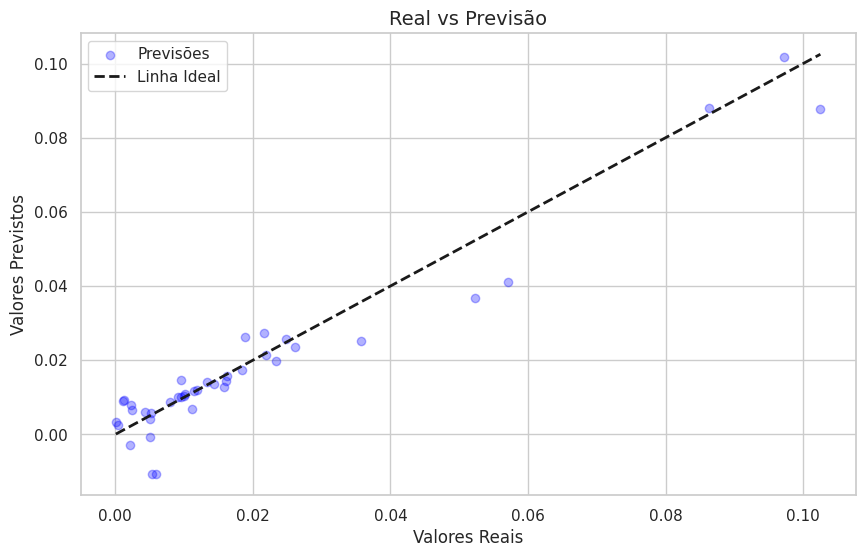

In [ ]:
# Passo 14: Visualizar resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='blue', label='Previsões')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Linha Ideal')
plt.xlabel('Valores Reais', fontsize=12)
plt.ylabel('Valores Previstos', fontsize=12)
plt.title('Real vs Previsão', fontsize=14)
plt.legend()
plt.show()

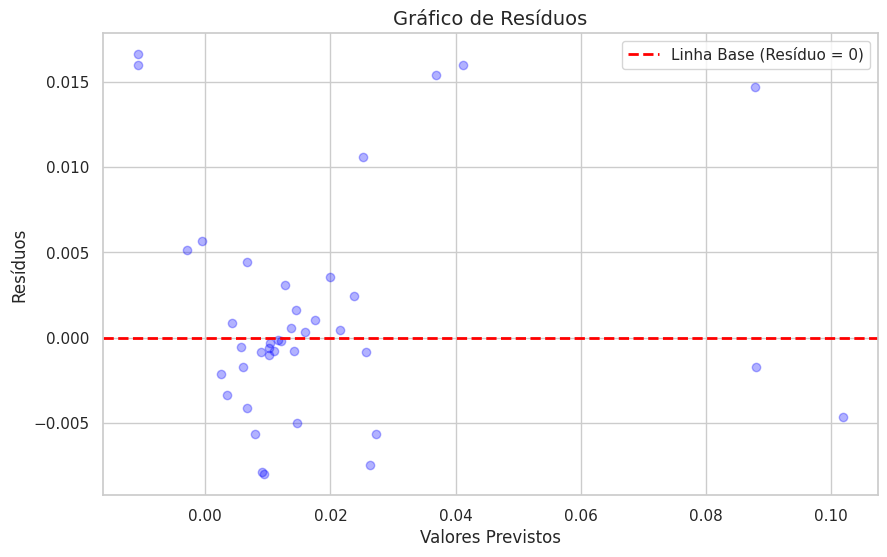

In [ ]:
# Passo 15: Gráfico de resíduos
residuos = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, alpha=0.3, color='blue')
plt.axhline(0, color='red', linestyle='--', lw=2, label='Linha Base (Resíduo = 0)')
plt.xlabel('Valores Previstos', fontsize=12)
plt.ylabel('Resíduos', fontsize=12)
plt.title('Gráfico de Resíduos', fontsize=14)
plt.legend()
plt.show()